In [1]:
from utils.analysis.tools import simDir, springPhaseDiagram
from pathlib import Path
from utils.file_operations import input_parse
from tqdm import tqdm
import multiprocessing as mp 
from pathlib import Path
from utils import plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/")

In [2]:
no_condensate = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240118_RNAOnly/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_6_M3_1.0_kt_0.0_rl_9.0_wd_0.0")
no_condensate.run()
no_condensate.rna()
no_condensate_rna = no_condensate.rna_amount[-1][0]

Using default movie parameters.


In [4]:
class springPhaseDiagram:
    def __init__(self,
                 directory: str,
                 sweep_parameters: str):
        self.sweep_directory = Path(directory)
        self.sweep_parameters = sweep_parameters

    def extract_data(self,frame):
        simdir_paths = [file.parent for file in self.sweep_directory.glob("./*/input_params.txt")]
        processes = mp.Pool(8-1)
        self.results = processes.map(self.worker,[(path,frame) for path in simdir_paths])
        self.df = pd.DataFrame(self.results)
        if 'rest_length' in self.df.columns:
            self.df.loc[:, "rest_length"] = self.df["rest_length"].apply(lambda x: eval(x)[0]).astype(np.float64)
        self.df.loc[:, "k_tilde"] = self.df["k_tilde"].astype(np.float64)
    
    def worker(self,worker_input):
        simdir_path, frame = worker_input
        sim = simDir(simdir_path)
        param_values = sim.params
        relevant_params = {parameter: str(param_values[parameter]) for parameter in self.sweep_parameters}
        sim.run()
        sim.rna()
        sim.condensate()
        return relevant_params | {"rna_amount": sim.rna_amount.flatten()[frame],
                                "condensate_com": sim.com[frame,0],
                                "aspect_ratio": sim.aspect_ratio[frame],
                                "mask": sim.xy[sim.mask[frame,:],:]}

In [8]:
spd = springPhaseDiagram(root/"20240116_PhaseDiagramSpringVsRestLengthCondensateMovesSeed",
                         ["k_tilde", "rest_length"])
spd.extract_data(400)

Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.

Using default movie parameters.Using default movie parameters.



Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using de

In [9]:
spd.df.to_pickle("20240116_PhaseDiagramSpringVsRestLengthCondensateMovesSeed.pkl")

In [3]:
df = pd.read_pickle("20240116_PhaseDiagramSpringVsRestLengthCondensateMovesSeed.pkl")

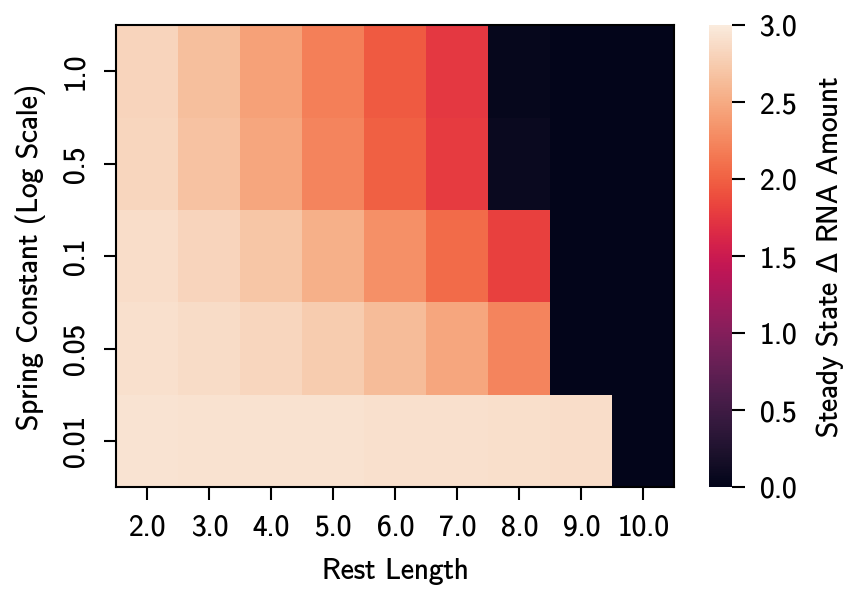

In [4]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = df.pivot(index="k_tilde",columns="rest_length",values=variable)
g = sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

In [7]:
df = pd.read_pickle("20240218_PhaseDiagramSpringVsRestLengthCondensateMovesSeedHighRes.pkl")

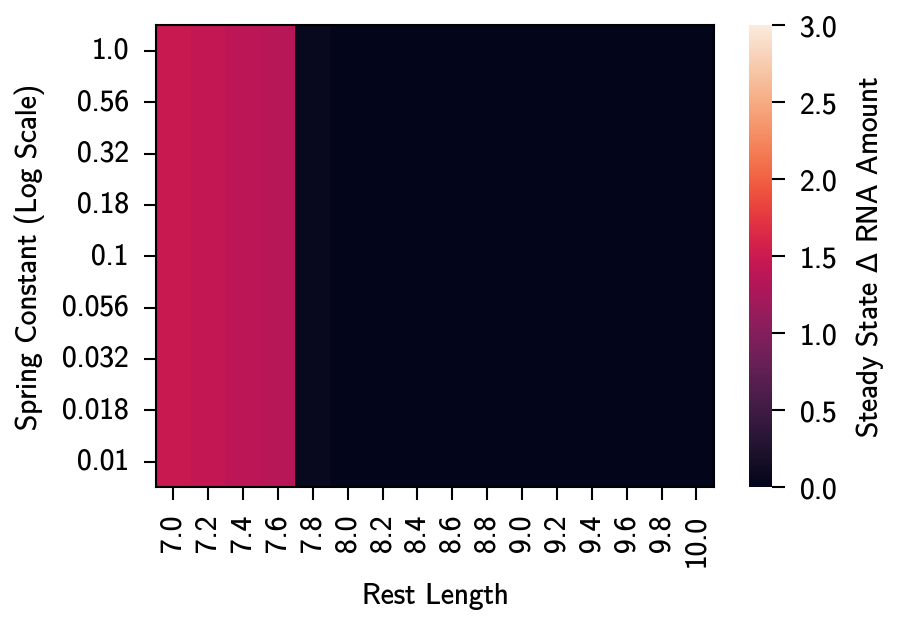

In [8]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = df.pivot(index="k_tilde",columns="rest_length",values=variable)
g = sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)